<a href="https://colab.research.google.com/github/Pallab07-Code/MQTT-Thesis-Repo/blob/main/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Message Query Telemetry Transport

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [ ]:
nsrdata = pd.read_csv('/content/binary_anova_features.csv')
nsrdata.head()

,State_CON,State_FIN,DstRate,SrcRate,Dur,Rate,TcpRtt,AckDat,SynAck,Load,Class
0,1,0,1865.671631,1865.671631,0.000536,5597.014648,0.000363,0.000260,0.000103,2.000000e+06,2.0
1,1,0,0.460668,0.460668,58.610584,0.938397,0.000221,0.000107,0.000114,9.030451e+02,2.0
2,0,1,0.187310,0.187310,16.016258,0.437056,0.007033,0.006826,0.000207,2.067899e+02,1.0
3,1,0,5917.159668,5917.159668,0.000169,17751.478516,0.000220,0.000111,0.000109,6.343195e+06,2.0
4,1,0,5780.347168,5780.347168,0.000173,17341.041016,0.000316,0.000213,0.000103,6.196532e+06,2.0


In [ ]:
nsrdata.describe()

,State_CON,State_FIN,DstRate,SrcRate,Dur,Rate,TcpRtt,AckDat,SynAck,Load,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000
mean,0.598000,0.369000,957.933441,970.470884,15.104639,3160.949370,0.005722,0.005557,0.000165,1.233210e+06,1.50000
std,0.490547,0.482775,1706.679697,1710.385632,21.641908,5190.605490,0.012846,0.012818,0.000123,2.959852e+06,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.00000
25%,0.000000,0.000000,0.187251,0.187265,0.000520,0.685754,0.000316,0.000213,0.000107,3.107615e+02,1.00000
50%,1.000000,0.000000,4.448836,4.448223,0.028632,151.966065,0.000452,0.000322,0.000130,8.965989e+03,1.50000
75%,1.000000,1.000000,1488.649658,1591.166077,28.753134,5405.405762,0.006358,0.006138,0.000194,1.729751e+06,2.00000
max,1.000000,1.000000,8849.557617,8849.557617,59.998638,26548.671875,0.241681,0.241569,0.002875,3.289159e+07,2.00000


In [ ]:
nsrdata.shape

(1000, 11)

In [ ]:
nsrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State_CON  1000 non-null   int64  
 1   State_FIN  1000 non-null   int64  
 2   DstRate    1000 non-null   float64
 3   SrcRate    1000 non-null   float64
 4   Dur        1000 non-null   float64
 5   Rate       1000 non-null   float64
 6   TcpRtt     1000 non-null   float64
 7   AckDat     1000 non-null   float64
 8   SynAck     1000 non-null   float64
 9   Load       1000 non-null   float64
 10  Class      1000 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 86.1 KB


In [ ]:
nsrdata.isnull().sum()

State_CON    0
State_FIN    0
DstRate      0
SrcRate      0
Dur          0
Rate         0
TcpRtt       0
AckDat       0
SynAck       0
Load         0
Class        0
dtype: int64

In [ ]:
nsrdata['Class'].value_counts()

2.0    500
1.0    500
Name: Class, dtype: int64

In [ ]:
Y = nsrdata.pop('Class')
X = nsrdata

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
Y=labelencoder_y.fit_transform(Y)

In [ ]:
Y.shape

(1000,)

In [ ]:
print(Y)

[1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler= StandardScaler()

In [ ]:
#X_train=scaler.fit_transform(X_train)

In [ ]:
#X_test=scaler.fit_transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((700, 10), (300, 10))

SVM

In [ ]:
from sklearn.svm import SVC
sclf = SVC(probability=True)
sclf.fit(X_train,Y_train)

SVC(probability=True)

In [ ]:
X1_train_prediction = sclf.predict(X_train)
training1_data_accuracy = accuracy_score(X1_train_prediction,Y_train)
print('Accuracy score of training data using SVM :',training1_data_accuracy)

Accuracy score of training data using SVM : 0.7828571428571428


In [ ]:
X1_test_prediction = sclf.predict(X_test)
testing1_data_accuracy = accuracy_score(X1_test_prediction,Y_test)
print('Accuracy score of testing data using SVM :',testing1_data_accuracy)

Accuracy score of testing data using SVM : 0.79


In [ ]:
precision_train= precision_score(Y_train,X1_train_prediction)
print('Precision value for training data: ',precision_train)
precision_test=precision_score(Y_test,X1_test_prediction)
print('Precision value for testing data: ',precision_test)

Precision value for training data:  1.0
Precision value for testing data:  1.0


In [ ]:
recall1_train=recall_score(Y_train,X1_train_prediction)
print('Recall value for training data: ',recall1_train)

recall1_test=recall_score(Y_test,X1_test_prediction)
print('Recall value for testing data: ',recall1_test)

Recall value for training data:  0.5777777777777777
Recall value for testing data:  0.55


In [ ]:
f1_1_train=f1_score(X1_train_prediction,Y_train)
print('f1 value for training data: ',f1_1_train)

f1_1_test=f1_score(X1_test_prediction,Y_test)
print('f1 value for testing data: ',f1_1_test)

f1 value for training data:  0.732394366197183
f1 value for testing data:  0.7096774193548387


In [ ]:
cf_matrix1=confusion_matrix(Y_test,X1_test_prediction)
print(cf_matrix1)

[[160   0]
 [ 63  77]]


In [ ]:
tn, fp, fn, tp = cf_matrix1.ravel()

print(tn, fp, fn, tp)

160 0 63 77


In [ ]:
def specificity(tn, fp, fn, tp):
  return tn / (tn + fp)

In [ ]:
spec = specificity(tn, fp, fn, tp)
print("Specificity for svm : ", spec)

Specificity for svm :  1.0


<function matplotlib.pyplot.show(close=None, block=None)>

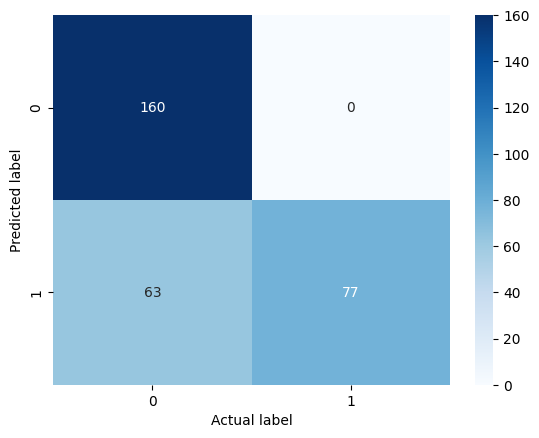

In [ ]:
sns.heatmap(cf_matrix1,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show

In [ ]:
cl_report1=classification_report(Y_test,X1_test_prediction)
print('Classification Report : \n',cl_report1)

Classification Report : 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       160
           1       1.00      0.55      0.71       140

    accuracy                           0.79       300
   macro avg       0.86      0.78      0.77       300
weighted avg       0.85      0.79      0.78       300



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclr = RandomForestClassifier()
rfclr.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
X_train_prediction = rfclr.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data using random forest:',training_data_accuracy)

Accuracy score of training data using random forest: 1.0


In [ ]:
X_test_prediction = rfclr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of testing data using random forest :',testing_data_accuracy)

Accuracy score of testing data using random forest : 0.9966666666666667


In [ ]:
precision1_train= precision_score(Y_train,X_train_prediction)
print('Precision value for training data: ',precision1_train)
precision1_test=precision_score(Y_test,X_test_prediction)
print('Precision value for testing data: ',precision1_test)

Precision value for training data:  1.0
Precision value for testing data:  0.9929078014184397


In [ ]:
recall2_train=recall_score(Y_train,X_train_prediction)
print('Recall value for training data: ',recall2_train)
recall2_test=recall_score(Y_test,X_test_prediction)
print('Recall value for testing data: ',recall2_test)

Recall value for training data:  1.0
Recall value for testing data:  1.0


In [ ]:
f1_2_train=f1_score(X_train_prediction,Y_train)
print('f1 value for testing data: ',f1_2_train)
f1_2_test=f1_score(X_test_prediction,Y_test)
print('f1 value for testing data: ',f1_2_test)

f1 value for testing data:  1.0
f1 value for testing data:  0.9964412811387899


In [ ]:
cl_report1=classification_report(Y_test,X_test_prediction)
print('Classification Report : \n',cl_report1)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       160
           1       0.99      1.00      1.00       140

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
cf_matrix2=confusion_matrix(Y_test,X_test_prediction)
print(cf_matrix2)

[[159   1]
 [  0 140]]


In [ ]:
tn, fp, fn, tp = cf_matrix2.ravel()

print(tn, fp, fn, tp)

159 1 0 140


In [ ]:
def specificity(tn, fp, fn, tp):
  return tn / (tn + fp)

In [ ]:
spec1 = specificity(tn, fp, fn, tp)
print("Specificity for RF : ", spec1)

Specificity for RF :  0.99375


<function matplotlib.pyplot.show(close=None, block=None)>

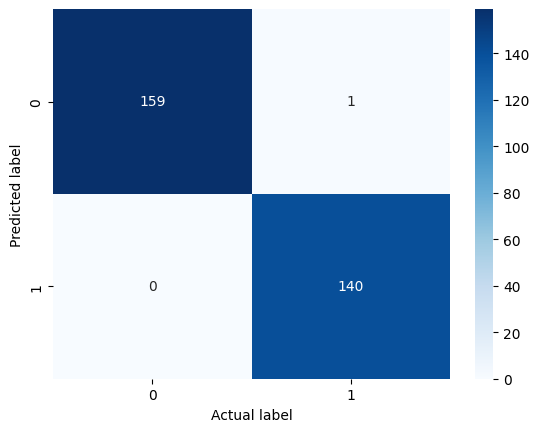

In [ ]:
sns.heatmap(cf_matrix2,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kclf= KNeighborsClassifier(n_neighbors= 5)
kclf.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
X2_train_prediction = kclf.predict(X_train)
training2_data_accuracy = accuracy_score(X2_train_prediction,Y_train)
print('Accuracy score of training data using Multinomial Naive Bayes :',training2_data_accuracy)

Accuracy score of training data using Multinomial Naive Bayes : 0.9814285714285714


In [ ]:
X2_test_prediction = kclf.predict(X_test)
testing2_data_accuracy = accuracy_score(X2_test_prediction,Y_test)
print('Accuracy score of testing data using KNN :',testing2_data_accuracy)

Accuracy score of testing data using KNN : 0.9733333333333334


In [ ]:
precision2_train= precision_score(Y_train,X2_train_prediction)
print('Precision value for training data: ',precision2_train)
precision2_test=precision_score(Y_test,X2_test_prediction)
print('Precision value for testing data: ',precision2_test)

Precision value for training data:  0.9753424657534246
Precision value for testing data:  0.9647887323943662


In [ ]:
recall3_train=recall_score(Y_train,X2_train_prediction)
print('Recall value for training data: ',recall3_train)

recall3_test=recall_score(Y_test,X2_test_prediction)
print('Recall value for testing data: ',recall3_test)

Recall value for training data:  0.9888888888888889
Recall value for testing data:  0.9785714285714285


In [ ]:
f1_3_train=f1_score(X2_train_prediction,Y_train)
print('f1 value for training data: ',f1_3_train)
f1_3_test=f1_score(X2_test_prediction,Y_test)
print('f1 value for testing data: ',f1_3_test)

f1 value for training data:  0.9820689655172414
f1 value for testing data:  0.9716312056737589


In [ ]:
cl_report2=classification_report(Y_test,X2_test_prediction)
print('Classification Report : \n',cl_report2)

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       160
           1       0.96      0.98      0.97       140

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
cf_matrix3=confusion_matrix(Y_test,X2_test_prediction)
print(cf_matrix3)

[[155   5]
 [  3 137]]


In [ ]:
tn, fp, fn, tp = cf_matrix3.ravel()

print(tn, fp, fn, tp)

155 5 3 137


<function matplotlib.pyplot.show(close=None, block=None)>

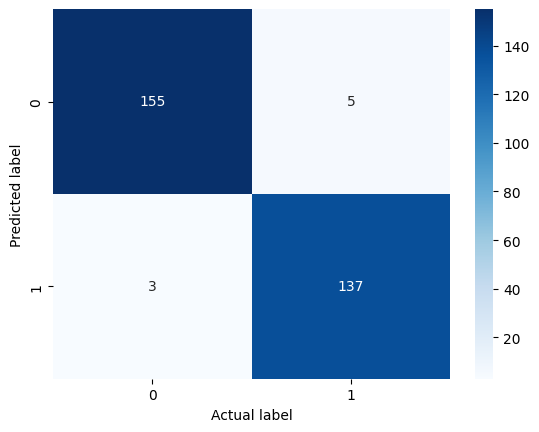

In [ ]:
sns.heatmap(cf_matrix3,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnnb = MultinomialNB()
mnnb.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
X3_train_prediction = mnnb.predict(X_train)
training3_data_accuracy = accuracy_score(X3_train_prediction,Y_train)
print('Accuracy score of training data using Multinomial Naive Bayes :',training3_data_accuracy)

Accuracy score of training data using Multinomial Naive Bayes : 0.5385714285714286


In [ ]:
X3_test_prediction = mnnb.predict(X_test)
testing3_data_accuracy = accuracy_score(X3_test_prediction,Y_test)
print('Accuracy score of testing data using Multinomial Naive Bayes :',testing3_data_accuracy)

Accuracy score of testing data using Multinomial Naive Bayes : 0.54


In [ ]:
precision3_train= precision_score(Y_train,X3_train_prediction)
print('Precision value for training data: ',precision3_train)
precision3_test=precision_score(Y_test,X3_test_prediction)
print('Precision value for testing data: ',precision3_test)

Precision value for training data:  0.5475578406169666
Precision value for testing data:  0.50625


In [ ]:
recall4_train=recall_score(Y_train,X3_train_prediction)
print('Recall value for training data: ',recall4_train)
recall4_test=recall_score(Y_test,X3_test_prediction)
print('Recall value for testing data: ',recall4_test)

Recall value for training data:  0.5916666666666667
Recall value for testing data:  0.5785714285714286


In [ ]:
f1_4_train=f1_score(X3_train_prediction,Y_train)
print('f1 value for testing data: ',f1_4_train)
f1_4_test=f1_score(X3_test_prediction,Y_test)
print('f1 value for testing data: ',f1_4_test)

f1 value for testing data:  0.568758344459279
f1 value for testing data:  0.5399999999999999


In [ ]:
cl_report3=classification_report(Y_test,X3_test_prediction)
print('Classification Report : \n',cl_report3)

Classification Report : 
               precision    recall  f1-score   support

           0       0.58      0.51      0.54       160
           1       0.51      0.58      0.54       140

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



In [ ]:
cf_matrix4=confusion_matrix(Y_test,X3_test_prediction)
print(cf_matrix4)

[[81 79]
 [59 81]]


In [ ]:
tn, fp, fn, tp = cf_matrix4.ravel()

print(tn, fp, fn, tp)

81 79 59 81


<function matplotlib.pyplot.show(close=None, block=None)>

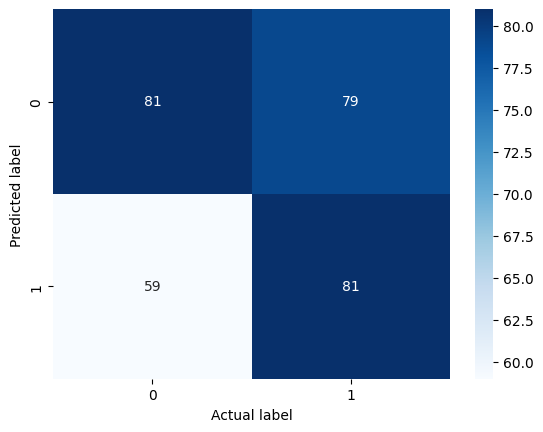

In [ ]:
sns.heatmap(cf_matrix4,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show

XGboost

In [ ]:
from xgboost import XGBClassifier
xclf = XGBClassifier()
xclf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
X4_train_prediction = xclf.predict(X_train)
training4_data_accuracy = accuracy_score(X4_train_prediction,Y_train)
print('Accuracy score of training data using xgboost :',training4_data_accuracy)

Accuracy score of training data using xgboost : 1.0


In [ ]:
X4_test_prediction = xclf.predict(X_test)
testing4_data_accuracy = accuracy_score(X4_test_prediction,Y_test)
print('Accuracy score of testing data using xgboost :',testing4_data_accuracy)

Accuracy score of testing data using xgboost : 0.9966666666666667


In [ ]:
precision4_train= precision_score(Y_train,X4_train_prediction)
print('Precision value for training data: ',precision4_train)
precision4_test=precision_score(Y_test,X4_test_prediction)
print('Precision value for testing data: ',precision4_test)

Precision value for training data:  1.0
Precision value for testing data:  0.9929078014184397


In [ ]:
recall5_train=recall_score(Y_train,X4_train_prediction)
print('Recall value for training data: ',recall5_train)

recall5_test=recall_score(Y_test,X4_test_prediction)
print('Recall value for testing data: ',recall5_test)

Recall value for training data:  1.0
Recall value for testing data:  1.0


In [ ]:
f1_5_train=f1_score(X4_train_prediction,Y_train)
print('f1 value for testing data: ',f1_5_train)

f1_5_test=f1_score(X4_test_prediction,Y_test)
print('f1 value for testing data: ',f1_5_test)

f1 value for testing data:  1.0
f1 value for testing data:  0.9964412811387899


In [ ]:
cl_report4=classification_report(Y_test,X4_test_prediction)
print('Classification Report : \n',cl_report4)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       160
           1       0.99      1.00      1.00       140

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
cf_matrix5=confusion_matrix(Y_test,X4_test_prediction)
print(cf_matrix5)

[[159   1]
 [  0 140]]


In [ ]:
tn, fp, fn, tp = cf_matrix5.ravel()

print(tn, fp, fn, tp)

159 1 0 140


<function matplotlib.pyplot.show(close=None, block=None)>

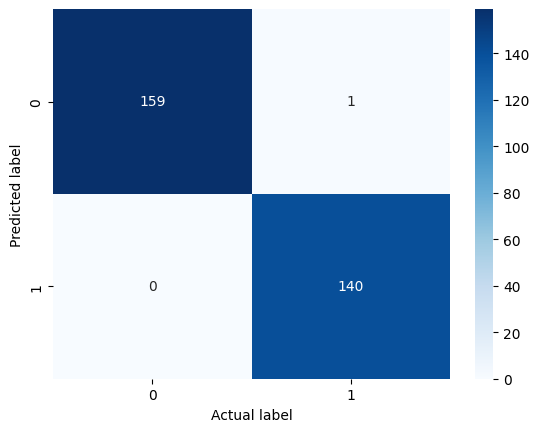

In [ ]:
sns.heatmap(cf_matrix5,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show

Decision Tree

In [ ]:
from sklearn import tree
tclf = tree.DecisionTreeClassifier()
tclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
X5_train_prediction = tclf.predict(X_train)
training5_data_accuracy = accuracy_score(X5_train_prediction,Y_train)
print('Accuracy score of training data using Decision Tree :',training5_data_accuracy)

Accuracy score of training data using Decision Tree : 1.0


In [ ]:
X5_test_prediction = tclf.predict(X_test)
testing5_data_accuracy = accuracy_score(X5_test_prediction,Y_test)
print('Accuracy score of testing data using Decision Tree :',testing5_data_accuracy)

Accuracy score of testing data using Decision Tree : 0.9966666666666667


In [ ]:
precision5_train= precision_score(Y_train,X5_train_prediction)
print('Precision value for training data: ',precision5_train)
precision5_test=precision_score(Y_test,X5_test_prediction)
print('Precision value for testing data: ',precision5_test)

Precision value for training data:  1.0
Precision value for testing data:  0.9929078014184397


In [ ]:
recall6_train=recall_score(Y_train,X5_train_prediction)
print('Recall value for training data: ',recall6_train)

recall6_test=recall_score(Y_test,X5_test_prediction)
print('Recall value for testing data: ',recall6_test)

Recall value for training data:  1.0
Recall value for testing data:  1.0


In [ ]:
f1_6_train=f1_score(X5_train_prediction,Y_train)
print('f1 value for testing data: ',f1_6_train)
f1_6_test=f1_score(X5_test_prediction,Y_test)
print('f1 value for testing data: ',f1_6_test)

f1 value for testing data:  1.0
f1 value for testing data:  0.9964412811387899


In [ ]:
cl_report5=classification_report(Y_test,X5_test_prediction)
print('Classification Report : \n',cl_report5)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       160
           1       0.99      1.00      1.00       140

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
cf_matrix6=confusion_matrix(Y_test,X5_test_prediction)
print(cf_matrix6)

[[159   1]
 [  0 140]]


In [ ]:
tn, fp, fn, tp = cf_matrix6.ravel()

print(tn, fp, fn, tp)

159 1 0 140


<function matplotlib.pyplot.show(close=None, block=None)>

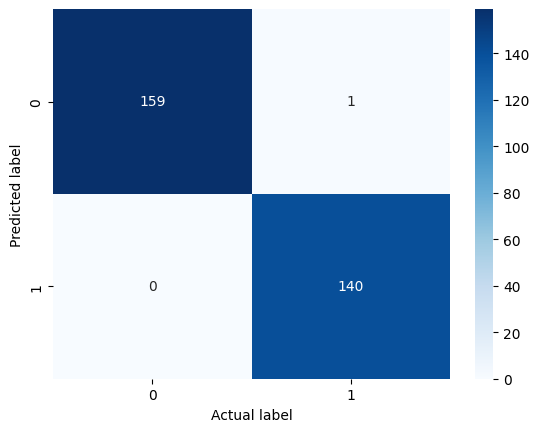

In [ ]:
sns.heatmap(cf_matrix6,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show

Logistic Regression


In [ ]:
train = LogisticRegression(max_iter=1000)
train.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
X6_train_prediction = train.predict(X_train)
training6_data_accuracy = accuracy_score(X6_train_prediction,Y_train)
print('Accuracy score of training data :',training6_data_accuracy)

Accuracy score of training data : 0.5685714285714286


In [ ]:
X6_test_prediction = train.predict(X_test)
test_data_accuracy = accuracy_score(X6_test_prediction,Y_test)
print('Accuracy score of test data :',test_data_accuracy)

Accuracy score of test data : 0.53


In [ ]:
precision6_train= precision_score(Y_train,X6_train_prediction)
print('Precision value for training data: ',precision6_train)
precision6_test=precision_score(Y_test,X6_test_prediction)
print('Precision value for testing data: ',precision6_test)

Precision value for training data:  0.5438066465256798
Precision value for testing data:  0.498220640569395


In [ ]:
recall7_train=recall_score(Y_train,X6_train_prediction)
print('Recall value for training data: ',recall7_train)

recall7_test=recall_score(Y_test,X6_test_prediction)
print('Recall value for testing data: ',recall7_test)

Recall value for training data:  1.0
Recall value for testing data:  1.0


In [ ]:
f1_7_train=f1_score(X6_train_prediction,Y_train)
print('f1 value for testing data: ',f1_7_train)
f1_7_test=f1_score(X6_test_prediction,Y_test)
print('f1 value for testing data: ',f1_7_test)

f1 value for testing data:  0.7045009784735813
f1 value for testing data:  0.665083135391924


In [ ]:
cl_report6=classification_report(Y_test,X6_test_prediction)
print('Classification Report : \n',cl_report6)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.12      0.21       160
           1       0.50      1.00      0.67       140

    accuracy                           0.53       300
   macro avg       0.75      0.56      0.44       300
weighted avg       0.77      0.53      0.42       300



In [ ]:
cf_matrix7=confusion_matrix(Y_test,X6_test_prediction)
print(cf_matrix7)

[[ 19 141]
 [  0 140]]


In [ ]:
tn, fp, fn, tp = cf_matrix7.ravel()

print(tn, fp, fn, tp)

19 141 0 140


<function matplotlib.pyplot.show(close=None, block=None)>

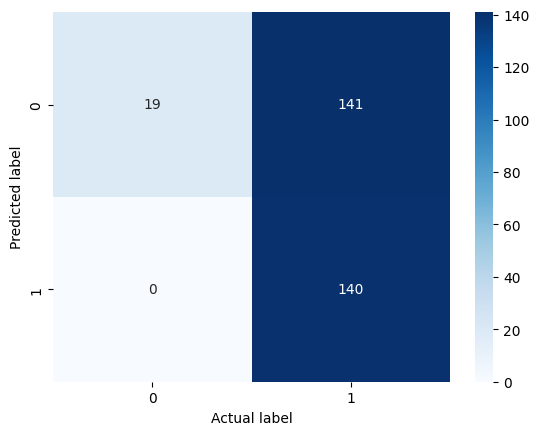

In [ ]:
sns.heatmap(cf_matrix7,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show

ROC Curve

In [ ]:
#Prediction Probabilities
r_probs=[ 0 for _ in range(len(Y_test))]
rf_probs=rfclr.predict_proba(X_test)
svm_probs=sclf.predict_proba(X_test)
xg_probs=xclf.predict_proba(X_test)
nb_probs=mnnb.predict_proba(X_test)
knn_probs=kclf.predict_proba(X_test)
dt_probs=tclf.predict_proba(X_test)
lr_probs=train.predict_proba(X_test)

In [ ]:
svm_probs=svm_probs[:,1]
rf_probs = rf_probs[:,1]
xg_probs = xg_probs[:,1]
nb_probs = nb_probs[:,1]
knn_probs = knn_probs[:,1]
dt_probs = dt_probs[:,1]
lr_probs = lr_probs[:,1]

In [ ]:
svm_auc = roc_auc_score(Y_test,svm_probs)
rf_auc = roc_auc_score(Y_test,rf_probs)
xg_auc = roc_auc_score(Y_test,xg_probs)
nb_auc = roc_auc_score(Y_test,nb_probs)
knn_auc = roc_auc_score(Y_test,knn_probs)
dt_auc = roc_auc_score(Y_test,dt_probs)
lr_auc = roc_auc_score(Y_test,lr_probs)

In [ ]:
print('Support vector machine : AUROC = %0.2f '%(svm_auc))
print('Random Forest : AUROC = %0.2f '%(rf_auc))
print('XGboost : AUROC = %0.2f '%(xg_auc))
print('Multinomial Naive Bayes : AUROC = %0.2f '%(nb_auc))
print('K-Nearest Neighbors : AUROC = %0.2f '%(knn_auc))
print('Decision Tree : AUROC = %0.2f '%(dt_auc))
print('Logistic Regression : AUROC = %0.2f '%(lr_auc))

Support vector machine : AUROC = 0.77 
Random Forest : AUROC = 1.00 
XGboost : AUROC = 1.00 
Multinomial Naive Bayes : AUROC = 0.48 
K-Nearest Neighbors : AUROC = 0.99 
Decision Tree : AUROC = 1.00 
Logistic Regression : AUROC = 0.82 


In [ ]:
  # Predicting the test set results
  svm_fpr, svm_tpr, _=roc_curve(Y_test,svm_probs)
  rf_fpr, rf_tpr, _=roc_curve(Y_test,rf_probs)
  xg_fpr, xg_tpr, _=roc_curve(Y_test,xg_probs)
  nb_fpr, nb_tpr, _=roc_curve(Y_test,nb_probs)
  knn_fpr, knn_tpr, _=roc_curve(Y_test,knn_probs)
  dt_fpr, dt_tpr, _=roc_curve(Y_test,dt_probs)
  lr_fpr, lr_tpr, _=roc_curve(Y_test,lr_probs)

In [ ]:
 def plot_roc_curve(svm_fpr, svm_tpr):
   plt.plot(svm_fpr, svm_tpr, marker='.',label='Support vector machine : AUROC = %0.2f '%(svm_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('Trude Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

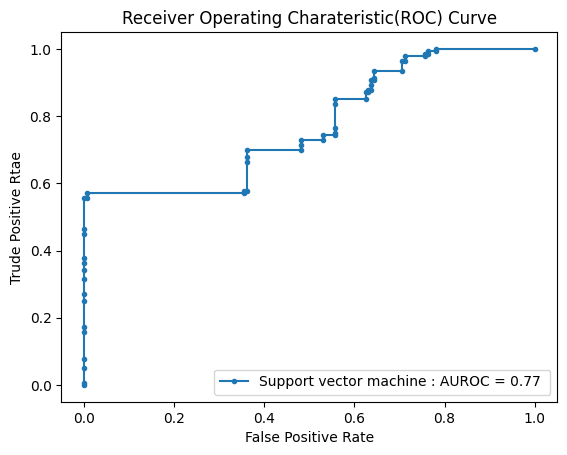

In [ ]:
plot_roc_curve(svm_fpr, svm_tpr)

In [ ]:
 def plot_roc_curve(rf_fpr, rf_tpr):
   plt.plot(rf_fpr, rf_tpr, marker='.',label='Random Forest : AUROC = %0.2f '%(rf_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('Trude Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

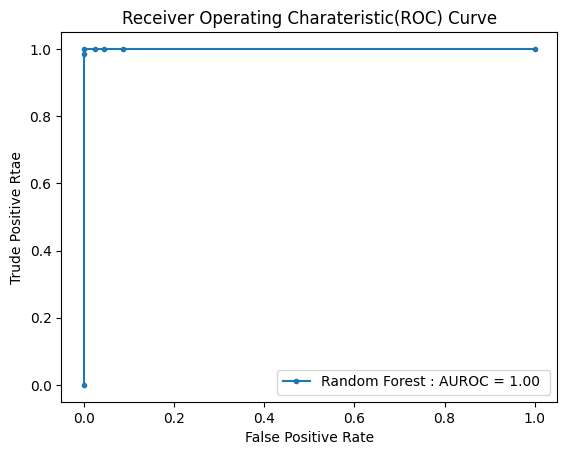

In [ ]:
 plot_roc_curve(rf_fpr, rf_tpr)

In [ ]:
def plot_roc_curve(nb_fpr, nb_tpr):
   plt.plot(nb_fpr, nb_tpr, marker='.',label='Multinomail naive bayes : AUROC = %0.2f '%(nb_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

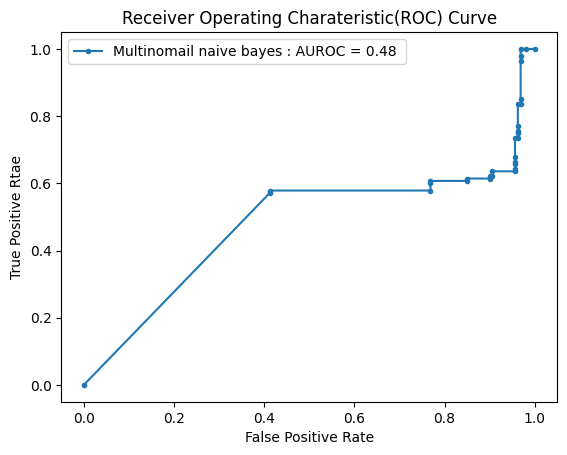

In [ ]:
plot_roc_curve(nb_fpr, nb_tpr)

In [ ]:
def plot_roc_curve(rf_fpr, rf_tpr):
   plt.plot(knn_fpr, knn_tpr, marker='*',label='K-nearest Neighbour : AUROC = %0.2f '%(knn_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('Trude Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

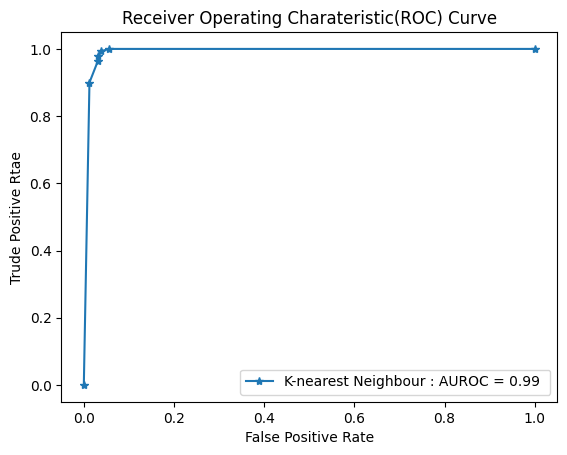

In [ ]:
 plot_roc_curve(rf_fpr, rf_tpr)

In [ ]:
def plot_roc_curve(rf_fpr, rf_tpr):
   plt.plot(dt_fpr, dt_tpr, marker='.',label='Decision Tree : AUROC = %0.2f '%(dt_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('Trude Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

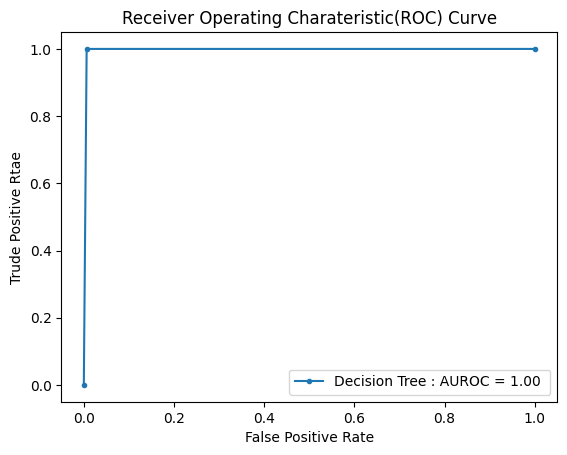

In [ ]:
 plot_roc_curve(rf_fpr, rf_tpr)

In [ ]:
def plot_roc_curve(rf_fpr, rf_tpr):
   plt.plot(lr_fpr, lr_tpr, marker='.',label='Logistic Regression : AUROC = %0.2f '%(lr_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('Trude Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

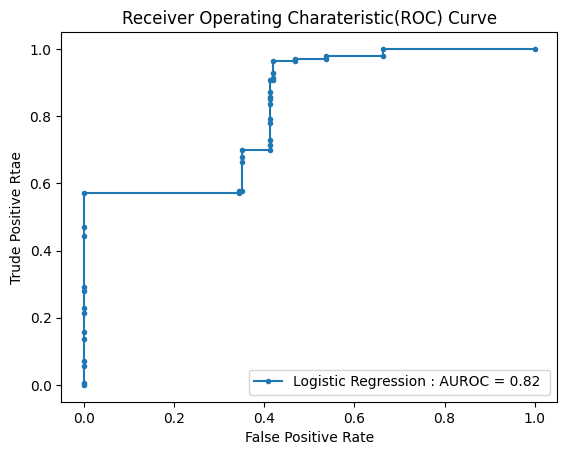

In [ ]:
 plot_roc_curve(rf_fpr, rf_tpr)

In [ ]:
def plot_roc_curve(rf_fpr, rf_tpr):
   plt.plot(xg_fpr, xg_tpr, marker='.',label='XGboost : AUROC = %0.2f '%(xg_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('Trude Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

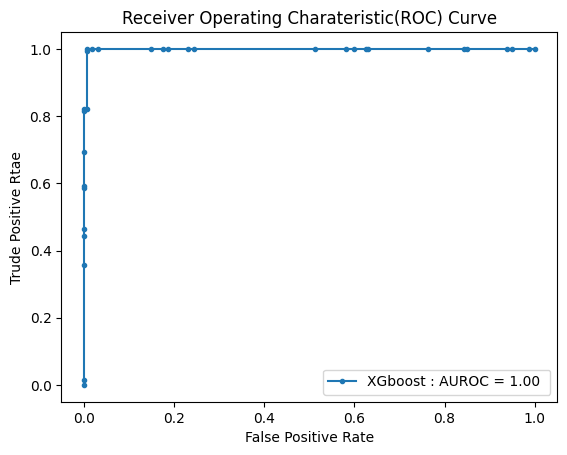

In [ ]:
plot_roc_curve(rf_fpr, rf_tpr)

In [ ]:
def plot_roc_curve(rf_fpr, rf_tpr):
   plt.plot(svm_fpr, svm_tpr, marker='.',label='Support vector machine : AUROC = %0.2f '%(svm_auc))
   plt.plot(rf_fpr, rf_tpr, marker='.',label='Random Forest : AUROC = %0.2f '%(rf_auc))
   plt.plot(xg_fpr, xg_tpr, marker='.',label='XGboost : AUROC = %0.2f '%(xg_auc))
   plt.plot(nb_fpr, nb_tpr, marker='.',label='Multinomial Naive Bayes : AUROC = %0.2f '%(nb_auc))
   plt.plot(knn_fpr, knn_tpr, marker='.',label='K-Nearest Neighbors : AUROC = %0.2f '%(knn_auc))
   plt.plot(dt_fpr, dt_tpr, marker='.',label='Decision Tree : AUROC = %0.2f '%(dt_auc))
   plt.plot(lr_fpr, lr_tpr, marker='.',label='Logistic Regression : AUROC = %0.2f '%(lr_auc))
   plt.xlabel('False Positive Rate')
   plt.ylabel('Trude Positive Rtae')
   plt.title('Receiver Operating Charateristic(ROC) Curve')
   plt.legend()
   plt.show()

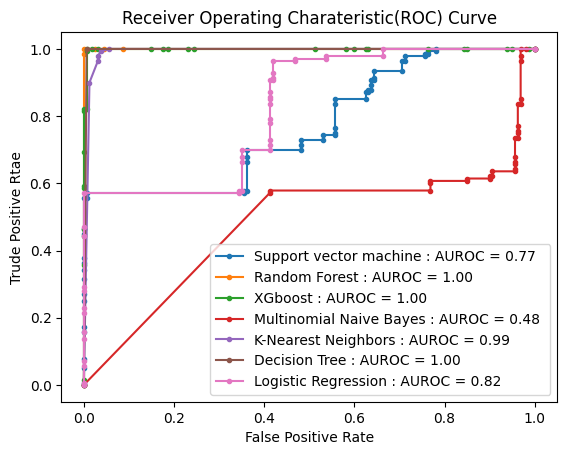

In [ ]:
plot_roc_curve(rf_fpr, rf_tpr)

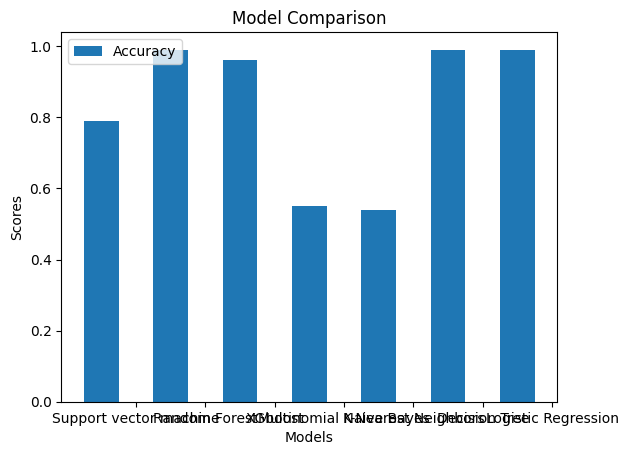

In [ ]:
# Define the models and their results
models = ['Support vector machine', 'Random Forest', 'XGboost','Multinomial Naive Bayes','K-Nearest Neighbors','Decision Tree','Logistic Regression']
accuracies = [0.79, 0.99, 0.96,0.55,0.54,0.99,0.99]
#precisions = [0.82, 0.88, 0.91]
#recalls = [0.84, 0.89, 0.90]

# Create a bar chart to compare the results
x = [i for i, _ in enumerate(models)]
width = 0.50
hieght=1.0

plt.bar(x, accuracies, width, label='Accuracy')
#plt.bar([i + width for i in x], precisions, width, label='Precision')
#plt.bar([i + width*2 for i in x], recalls, width, label='Recall')

# Add labels and titles to the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks([i + width for i in x], models)
plt.legend(loc='best')

# Show the plot
plt.show()